# 

In [1]:
#Starting with usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [11]:
calendar_df = pd.read_csv('calendar.zip')
print(calendar_df.shape)
listings_df = pd.read_csv('listings.zip')
print(listings_df.shape)
reviews_df = pd.read_csv('reviews.zip')
print(reviews_df.shape)



(4190565, 7)
(11481, 106)
(175562, 6)


# 1. Listings_df 

### Upon importing, we immediately see a problem arise; columns (43,61,62,94) of listings_df contain mixed data types.
Let's take a closer look.

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,f,f,flexible,f,f,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.52
3,127383,https://www.airbnb.com/rooms/127383,20191125094942,2019-11-25,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,none,NaN,...,f,f,flexible,t,f,2,1,1,0,0.79
4,157808,https://www.airbnb.com/rooms/157808,20191125094942,2019-11-25,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,none,"In der Nähe befinden sich einige Kaffees,Kneip...",...,f,f,moderate,f,f,1,0,1,0,NaN


In [4]:
#These are the columns
listings_df.columns[[43,61,62,94]]

Index(['zipcode', 'weekly_price', 'monthly_price', 'license'], dtype='object')

In [5]:
#What are the mixed types?
for i in listings_df.columns[[43,61,62,94]]:
    print(listings_df[i].apply(type).value_counts())
    print("\n")

<class 'str'>      7967
<class 'float'>    3514
Name: zipcode, dtype: int64


<class 'float'>    10372
<class 'str'>       1109
Name: weekly_price, dtype: int64


<class 'float'>    10761
<class 'str'>        720
Name: monthly_price, dtype: int64


<class 'float'>    11477
<class 'str'>          4
Name: license, dtype: int64




In [6]:
#Let's take a peek at the actual data
listings_df[listings_df.columns[[43,61,62,94]]].head(3)

,zipcode,weekly_price,monthly_price,license
0,80469,$800.00,NaN,NaN
1,81375,$450.00,"$1,100.00",NaN
2,81671,$630.00,"$1,950.00",NaN


In [7]:
listings_df['license'].isnull().mean()

0.9996515982928317

* zipcode needs to be converted to str
* prices need to be float
* we can just ignore license since most of its data is missing

## But first, let's remove columns with too much missing data


In [8]:
#We will set the threshold to 50%
nacols = listings_df.isnull().mean()[listings_df.isnull().mean()> .5].index
#Display the columns
listings_df.isnull().mean()[listings_df.isnull().mean()> .5]

notes                           0.710043
access                          0.559185
house_rules                     0.516157
thumbnail_url                   1.000000
medium_url                      1.000000
xl_picture_url                  1.000000
host_about                      0.563540
host_acceptance_rate            1.000000
neighbourhood_group_cleansed    1.000000
square_feet                     0.985454
weekly_price                    0.903406
monthly_price                   0.937288
license                         0.999652
jurisdiction_names              1.000000
dtype: float64

In [9]:
listings_df.drop(nacols, axis=1, inplace = True)

In [10]:
listings_df.shape

(11481, 92)

### Fixing Data Types

Changing $x,xxx to float

In [14]:
#First, scan the entire dataframe for any more columns with $

cols_with_dollar = []
for col in listings_df.columns:
    col_cat = listings_df[col].astype('str').str.cat(sep = ' ')
    if "$" in col_cat:
        cols_with_dollar.append(col)
cols_with_dollar

['summary',
 'description',
 'neighborhood_overview',
 'transit',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people']

In [27]:
#Take a look these columns
listings_df[cols_with_dollar].head(3)


,summary,description,neighborhood_overview,transit,price,security_deposit,cleaning_fee,extra_people
0,"Very quiet, yet centrally located 2 rooms apt....","Very quiet, yet centrally located 2 rooms apt....",Glockenbachviertel area has the hippest restau...,"Convenient public transport, walking distance ...",$95.00,$100.00,$30.00,$30.00
1,NaN,"We offer a modern, quiet apartment with a sunn...",We are living in a outskirt of Munich its call...,"Wir wohnen im Grünen und doch in Stadtnähe, Di...",$80.00,NaN,$10.00,$10.00
2,NaN,It´s a quiet and sunny apartment close to the ...,NaN,NaN,$95.00,$500.00,$60.00,$40.00


In [25]:
#We will take only the ones that are prices
pricecols = cols_with_dollar[4:]
pricecols


['price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [70]:
for col in pricecols:
    listings_df[col] = listings_df[col].str.replace('$','').str.replace(',','').astype(float)
listings_df[pricecols].head(3)

AttributeError: Can only use .str accessor with string values!

Changing id and zipcode to string

In [232]:
#Define a function to filter columns containing some word
def filter_columns(word, return_df = False, df=listings_df):
    
    filteredcols = list(filter(lambda x: word in x, listings_df.columns))
    if return_df:
        return df[filteredcols]
    else:
        return filteredcols

In [233]:
#Columns with 'id'
idcols = filter_columns('id')
idcols.append('zipcode')
for col in idcols:
    listings_df[col] = listings_df[col].astype(str)

converting columns with t/f to 1 and 0

In [160]:
#Columns containing t or f
cols_tf = []
for col in listings_df.select_dtypes(object):
    if listings_df[col].str.contains(r'^f$').any() or listings_df[col].str.contains(r'^t$').any():
        cols_tf.append(col)
        
print(len(cols_tf))
cols_tf

10


['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'is_business_travel_ready',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [174]:
for col in cols_tf:
    listings_df[col] = listings_df[col].str.replace('f','0').str.replace('t','1').astype('category')


In [185]:
listings_df.columns

0        98.0
1        97.0
2        95.0
3        97.0
4         NaN
         ... 
11476     NaN
11477     NaN
11478     NaN
11479     NaN
11480     NaN
Name: review_scores_rating, Length: 11481, dtype: float64

In [226]:
def filter_columns(word, df=listings_df):
    
    filteredcols = list(filter(lambda x: word in x, listings_df.columns))

    return df[filteredcols]

In [236]:
filter_columns('review',True)

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,25,0,2014-05-09,2017-07-22,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.37
1,131,17,2011-10-03,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,1.32
2,53,6,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,0.52
3,82,9,2011-06-04,2019-07-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.79
4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11476,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11477,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11478,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11479,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,0,0,strict_14_with_grace_period,0,0,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,0,0,flexible,0,0,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,0,0,strict_14_with_grace_period,0,0,2,2,0,0,0.52
3,127383,https://www.airbnb.com/rooms/127383,20191125094942,2019-11-25,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,none,NaN,...,0,0,flexible,1,0,2,1,1,0,0.79
4,157808,https://www.airbnb.com/rooms/157808,20191125094942,2019-11-25,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,none,"In der Nähe befinden sich einige Kaffees,Kneip...",...,0,0,moderate,0,0,1,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,40342200,https://www.airbnb.com/rooms/40342200,20191125094942,2019-11-25,Charmante Altbauwohnung im Herzen von München,"Sehr charmante, helle Altbauwohnung im Herzen ...",NaN,"Sehr charmante, helle Altbauwohnung im Herzen ...",none,Ruhiges Bewohnerviertel ohne Durchgangsverkehr...,...,0,0,moderate,0,0,1,1,0,0,NaN
11477,40343877,https://www.airbnb.com/rooms/40343877,20191125094942,2019-11-25,Central apartment near the Bavaria,"Big living room with large living room table, ...",NaN,"Big living room with large living room table, ...",none,NaN,...,0,0,flexible,0,0,4,1,3,0,NaN
11478,40344151,https://www.airbnb.com/rooms/40344151,20191125094942,2019-11-25,Room in Laim,The apartment is in Laim. Bus stop and a tram ...,NaN,The apartment is in Laim. Bus stop and a tram ...,none,NaN,...,0,0,flexible,0,0,1,0,1,0,NaN
11479,40347084,https://www.airbnb.com/rooms/40347084,20191125094942,2019-11-25,Neuhausen mit persönlichem Ambiente !,"Sie sind eingeladen, meine Wohnung (wunderbar ...",NaN,"Sie sind eingeladen, meine Wohnung (wunderbar ...",none,NaN,...,0,0,moderate,0,0,1,1,0,0,NaN


In [239]:
listings_df['neighbourhood']

0        Ludwigsvorstadt - Isarvorstadt
1                                Hadern
2                          Berg am Laim
3                           Maxvorstadt
4                      Schwabing - West
                      ...              
11476           Neuhausen - Nymphenburg
11477                          Sendling
11478                              Laim
11479                         Neuhausen
11480                               NaN
Name: neighbourhood, Length: 11481, dtype: object

In [246]:
listings_df.groupby('neighbourhood').mean()['price'].sort_values(ascending=False)

neighbourhood
Ludwigsvorstadt - Isarvorstadt                                    161.229046
Altstadt - Lehel                                                  152.075980
Schwanthalerhöhe                                                  134.633641
Trudering - Riem                                                  132.895973
Kleinhesselohe                                                    130.000000
Herzogpark                                                        128.703704
Au - Haidhausen                                                   122.808290
Maxvorstadt                                                       122.137184
Schwabing - Ost                                                   119.300000
Sendling                                                          116.556277
Obergiesing                                                       115.912371
Sendling - Westpark                                               113.195545
Allach - Untermenzing                                         

In [252]:
listings_df.groupby('neighbourhood').count().sort_values('id', ascending=False)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Ludwigsvorstadt - Isarvorstadt,1205,1205,1205,1205,1205,1149,781,1175,1205,646,...,1205,1205,1205,1205,1205,1205,1205,1205,1205,957
Maxvorstadt,1108,1108,1108,1108,1108,1053,687,1079,1108,614,...,1108,1108,1108,1108,1108,1108,1108,1108,1108,897
Schwabing - West,872,872,872,872,871,819,539,847,872,471,...,872,872,872,872,872,872,872,872,872,645
Au - Haidhausen,772,772,772,772,771,740,502,760,772,454,...,772,772,772,772,772,772,772,772,772,617
Sendling,462,462,462,462,462,441,287,456,462,233,...,462,462,462,462,462,462,462,462,462,364
Ramersdorf - Perlach,453,453,453,453,452,426,323,442,453,268,...,453,453,453,453,453,453,453,453,453,355
Schwanthalerhöhe,434,434,434,434,433,413,267,422,434,223,...,434,434,434,434,434,434,434,434,434,335
Neuhausen - Nymphenburg,409,409,409,409,409,385,245,393,409,224,...,409,409,409,409,409,409,409,409,409,320
Altstadt - Lehel,408,408,408,408,407,390,266,399,408,238,...,408,408,408,408,408,408,408,408,408,316


# Calendar_df

Cleaning:
* parse dates to datetime
* remove dollars from prices
* convert id to str

In [261]:
#Parse dates
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [263]:
#Remove dollar sign
pricecols = ['price','adjusted_price']
for col in pricecols:
    calendar_df[col] = calendar_df[col].str.replace('$','').str.replace(',','').astype(float)


AttributeError: Can only use .str accessor with string values!

In [266]:
calendar_df['available'] = calendar_df['available'].str.contains('t').astype('int')

In [267]:
calendar_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,216529,2019-11-25,0,150.0,150.0,5,60
1,159634,2019-11-25,0,53.0,53.0,14,90
2,159634,2019-11-26,0,53.0,53.0,14,90
3,159634,2019-11-27,0,53.0,53.0,14,90
4,159634,2019-11-28,0,53.0,53.0,14,90
...,...,...,...,...,...,...,...
4190560,40287455,2020-11-19,0,43.0,43.0,26,1125
4190561,40287455,2020-11-20,0,43.0,43.0,26,1125
4190562,40287455,2020-11-21,0,43.0,43.0,26,1125
4190563,40287455,2020-11-22,0,43.0,43.0,26,1125


In [264]:
calendar_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,216529,2019-11-25,f,150.0,150.0,5,60
1,159634,2019-11-25,f,53.0,53.0,14,90
2,159634,2019-11-26,f,53.0,53.0,14,90
3,159634,2019-11-27,f,53.0,53.0,14,90
4,159634,2019-11-28,f,53.0,53.0,14,90
...,...,...,...,...,...,...,...
4190560,40287455,2020-11-19,f,43.0,43.0,26,1125
4190561,40287455,2020-11-20,f,43.0,43.0,26,1125
4190562,40287455,2020-11-21,f,43.0,43.0,26,1125
4190563,40287455,2020-11-22,f,43.0,43.0,26,1125


In [268]:
calendar_df.query("available == 1")

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
12,159634,2019-12-06,1,53.0,53.0,14,90
13,159634,2019-12-07,1,53.0,53.0,14,90
14,159634,2019-12-08,1,53.0,53.0,14,90
15,159634,2019-12-09,1,53.0,53.0,14,90
16,159634,2019-12-10,1,53.0,53.0,14,90
...,...,...,...,...,...,...,...
4190241,40287455,2020-01-05,1,43.0,43.0,26,1125
4190242,40287455,2020-01-06,1,43.0,43.0,26,1125
4190243,40287455,2020-01-07,1,43.0,43.0,26,1125
4190244,40287455,2020-01-08,1,43.0,43.0,26,1125


In [271]:
day_mean = pd.DataFrame(calendar_df[calendar_df['available']==1].groupby(['date']).mean()['price'])

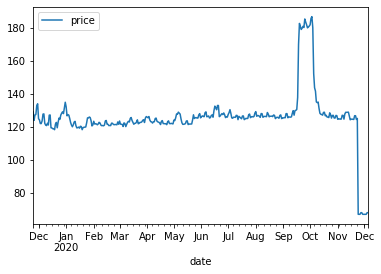

In [274]:
day_mean.plot();